<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных

Метод наименьших квадратов один из методов регрессионного анализа (изучения влияния независимых переменных на целевую с использованием статистических методов) который позволяет найти неизвестные параметры регрессионной модели по имеющимся для анализа данным. Упрощая можно сказать, что метод позволяет найти ту линию (прямую или кривую) которая лучшим образом описыват имеющийся набор данных (на которую наши данные похожи больше всего).


Следует сразу отметито, что статистическая зависимость не означает автоматически наличие причинно-следственных отношений.



Сформируем набор данных для исследования и для этого выберем несколько игроков с разным уровнем развития определённого качества (Level) и соотнесём его с количеством убитых монстров за первые пять минут игры (Frags)



Level|1|2|3|4|5|
--|--|--|--|--|--|
Frags|3| 6| 5| 7| 10


Как можно видеть разному уровню навыка соответствует различное количество монстров. Давайте посмотрим как это выглядит на простом точечном графике.

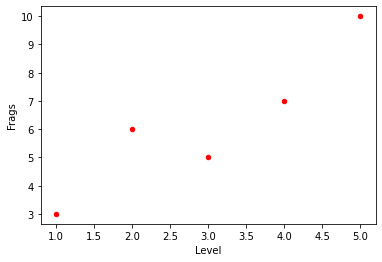

Просто точки дают нам мало понимания о закономерности этого соотношения, поэтому попробуем соединитить их непрерывной линией и обратим внимание, что мы можем изобразить такую кривую, расстояние до которой от каждой из наших точек будет минимальным.

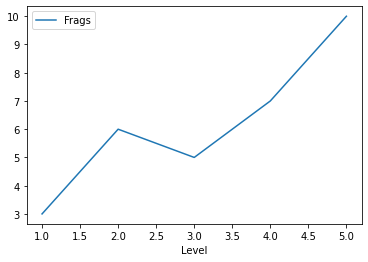

Как можно убедиться, действительно возможно подобрать линию, которая описывает наш набор данных. Однако, мы не можем сказать, что именно эта линия справляется с задачей лучше других и поэтому нам надо научиться получать формулу, которая позволит свести отклонения точки данных от линии к минимуму.

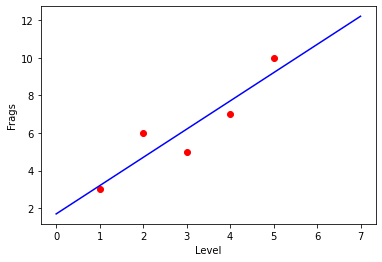

# Вычисление формулы описывающей набор данных

Мы можем сделать предположение, что для функции $y = f(x)$ , которая наилучшим образом приближает эмпирические (опытные) данные хорошо подойдёт прямая, а формула прямой нам хорошо известна $f(x) = ax+b$

Для того чтобы выбрать метрику оценивающую качество нашего приближения кривой к данным (апроксимации) мы заметим, что отклонения от линии $y - f(x)$ могут быть как положительными, так и отрицательными и если мы попробуем посчитать их сумму, то они могут компенсировать друг друга. Чтобы избежать этого, нужно оставить только значения отклонений и избавиться от знака. 

Для этого можно применять различные средства и методы, мы же используем возведение в квадрат, что даст нам возможность найти минимальное значение этих ошибок решив систему уравнений. Итак ошибка $e = y-f(x)$ должна быть вычислена для каждой точки данных и возведена в квадрат $$\sum_{i=1}^n e^2= \sum_{i=1}^n (y_i - f(x_i))^2 = \sum_{i=1}^n (y_i - (ax_i+b))^2 = F(a,b)$$

Для получения формулы прямой нам нужно найти два параметра $a$ и $b$, а для этого необходимо определить минимум функции двух переменных, так как именно эти параметры и являются нашими неизвестными. Мы знаем, что  своего минимума функция достигает в точке, где функция меняет убывание на возрастание,а её производная в этот момент будет равна нулю. Мы уже умеем находить производную функции одной переменной. Для нахождения производной функции двух переменных необходимо зафиусировать сначала одну из них и найти производную от второй, а затем зафиксировать вторую и найти производную от первой. В результате мы получим систему из двух уравнений, успешно решив которую найдём искомые коэффициенты.

 $$\begin{cases} a\sum_{i=1}^n x_i^2 +b\sum_{i=1}^n x_i=\sum_{i=1}^n x_iy_i, \\\\ a\sum_{i=1}^n x_i +bn=\sum_{i=1}^n y_i\end{cases}$$

<tr><th>$x_i$<th>1<th><th>2<th><th>3<th><th>4<th><th>5<th><th> $∑x_i$=<th>15
<tr><th>$y_i$ <th>3<th><th>6<th><th>5<th><th>7<th><th>10<th><th> $∑x_i$=<th>31
<tr><th>$x_i^2$ <th>1<th><th>4<th><th>9<th><th>16<th><th>25<th><th> $∑x_i^2$=<th>55
<tr><th>$x_iy_i$ <th>3<th><th>12<th><th>15<th><th>28<th><th>50<th><th> $∑x_iy_i$=<th>108

 Так мы получили систему уравнений, где неизвестные вместо $x$ и $y$ стали  $a$ и $b$ 
 $$\begin{cases} 55a +15b=108 \\\\ 15a + 5b=31\end{cases}$$

Эту систему можно решить разными способами, в том числе записав систему в виде матриц, но сейчас мы используем известный уже вам способ выразив сначала  переменную $b$ з второго уравнения
$$b =\frac{31-15a}{5}$$ 
Теперь подставим получившееся выражение в первое уравнение и найдём переменную $a$
$$55a + 3(31-15a)=108$$
$$55a-45a=108-93$$
$$10a=15$$
$$a= 1.5$$
Зная переменную $a$ мы без труда найдём переменную $b$
$$b=\frac{31-15*1.5}{5}=\frac{8.5}{5}$$
$$b=1.7$$


Таким образом мы получили формулу задающую прямую линию максимально точно описывающую наш набор данных
$$y = 1.5x+1.7$$
или подставив наши переменные это будет выглядеть так
$$\hat{Frags} = 1.5*Level+1.7$$

Подставив значение независимой переменной в формулу можно заметить, что несмотря на различие наблюдается сходство в изменении зависимой и независимой перемееных.

Зная формулу для прогноза мы можем подставив в неё два следующих значения независимой переменной получить ожидаемое значение зависимой (целевой).

|Level|1\.0|2\.0|3\.0|4\.0|5\.0|6\.0|7\.0|
|---|---|---|---|---|---|---|---|
|Frags|3\.0|6\.0|5\.0|7\.0|10\.0|---|---|
|Прогноз|3\.2|4\.7|6\.2|7\.7|9\.2|10\.7|12\.2|

# Задание

- Создать набор данных не менее чем 2 строк х 5 столбцов. 
- Одну из переменных назначить зависимой (целевой). 
- Методом наименьших квадратов найти коэффициенты линейной зависимости между независимой и зависимой переменной. 
- Создать прогноз для изменения зависимой переменной на следующие два значения независимой.

# Код для графиков и решения

Создание таблицы

In [ ]:
import pandas as pd
df = pd.DataFrame({'Frags':[3, 6, 5, 7, 10]})
df['Level'] = df.index+1
df['Прогноз'] = df['Level']*1.5+1.7
df.T


,0,1,2,3,4
Frags,3.0,6.0,5.0,7.0,10.0
Level,1.0,2.0,3.0,4.0,5.0
Прогноз,3.2,4.7,6.2,7.7,9.2


Расчёт двух следующих значений

In [ ]:
pd.DataFrame([6,7])*1.5+1.7

,0
0,10.7
1,12.2


Точечный и линейный графики

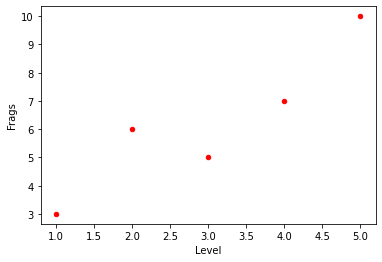

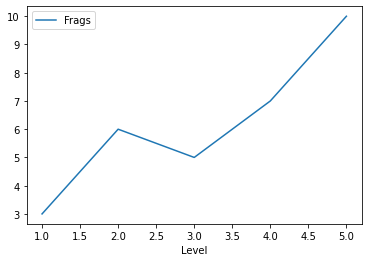

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(x="Level", y="Frags", kind="scatter", c='Red')
df.plot(x="Level", y="Frags")
plt.show()

Получение графика и коэффициентов линейной регрессии

[1.5 1.7]


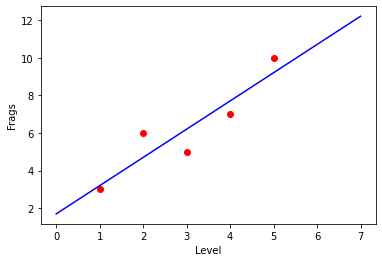

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
model = np.polyfit(df["Level"], df["Frags"], 1)
print(model)
prognoz = np.poly1d(model)
x_axis = range(8)
y_axis = prognoz(x_axis)
plt.xlabel('Level')
plt.ylabel('Frags')    
plt.scatter(df["Level"], df["Frags"], c = 'r')
plt.plot(x_axis, y_axis, c = 'b')